<a href="https://colab.research.google.com/github/joshIsac/computervisionlab/blob/main/2348523_CV_Lab_8_edge_detection_techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib .pyplot as plt
import pandas as pd


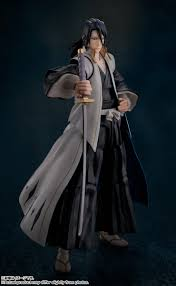

In [28]:
img_path="/content/drive/MyDrive/kuchiki byakuya.jpg"
img=cv2.imread(img_path,1)
cv2_imshow(img)

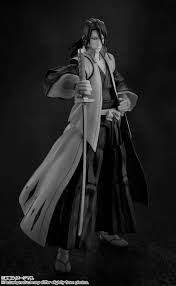

In [29]:
#convert the image to grayscale
img_gray=cv2.imread(img_path,0)
cv2_imshow(img_gray)

In [30]:
img.shape

(286, 176, 3)

In [31]:
print(img_gray)

[[  4   4   4 ...  10  10  10]
 [  4   4   4 ...  10  10  10]
 [  5   5   5 ...   9   9   9]
 ...
 [  0 175 193 ...   9   7   6]
 [  3  30   0 ...  15  14  13]
 [ 22   6   5 ...  19  19  20]]


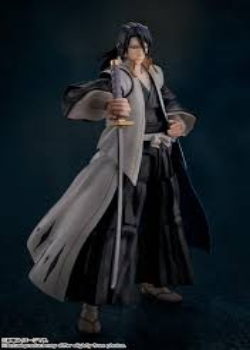

In [36]:
byakuya_img=cv2.resize(img, (250,350))
cv2_imshow(byakuya_img)

In [37]:
cv2.imwrite('byakuya1.jpg',byakuya_img)

True

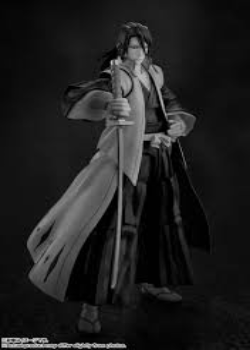

In [39]:
byakuya_img_gray=cv2.resize(img_gray, (250,350))
cv2_imshow(byakuya_img_gray)

In [40]:
cv2.imwrite('byakuyagray.jpg',byakuya_img_gray)

True

In [41]:
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
sharpened_img_gray= cv2.filter2D(byakuya_img_gray, -1, kernel)

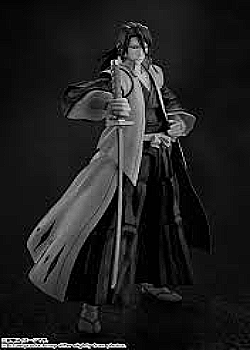

In [42]:
cv2_imshow(sharpened_img_gray)

In [43]:
#sobel operator
# Sobel kernels for gradient calculation
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [110]:
# Convolve the image with the kernels
grad_x = cv2.filter2D(sharpened_img_gray, -1, kernel_x)
grad_y = cv2.filter2D(sharpened_img_gray, -1, kernel_y)

# Combine the gradients
grad_combined =(grad_x+ grad_y).astype(np.uint8)


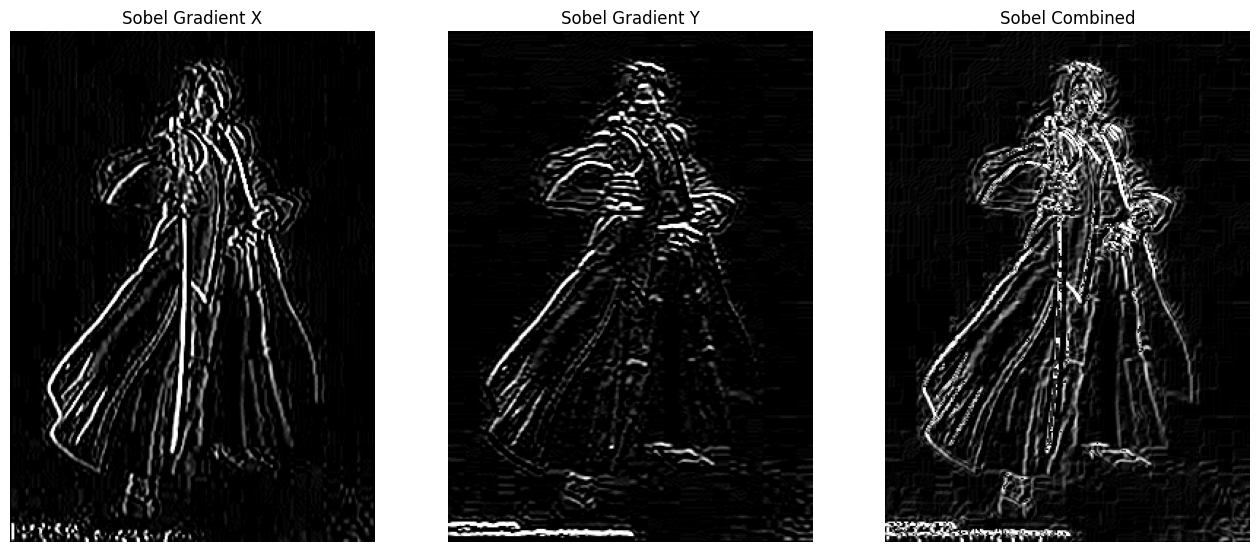

In [111]:
# Display the images
plt.figure(figsize=(16,12))

plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.axis('off')
plt.title('Sobel Gradient X'),

plt.subplot(1, 3, 2),
plt.imshow(grad_y, cmap='gray')
plt.axis('off')
plt.title('Sobel Gradient Y')

plt.subplot(1, 3, 3)
plt.imshow(grad_combined, cmap='gray')
plt.axis('off')
plt.title('Sobel Combined')
plt.show()


In [101]:
#second order derivative method
kernel = np.array([[1, 1, 1],[1, -8, 1],[1, 1, 1]])
laplacian_edge_detected_img= cv2.filter2D(byakuya_img_gray,-1,kernel)


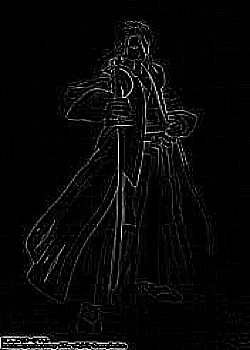

In [102]:
cv2_imshow(laplacian_edge_detected_img)

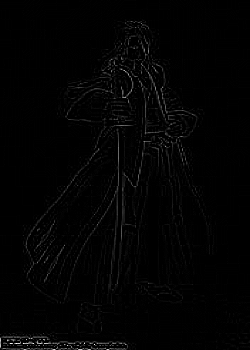

In [100]:
laplacian_edge_detected_img1=laplacian = cv2.Laplacian(byakuya_img_gray,cv2.CV_64F)
cv2_imshow(laplacian_edge_detected_img1)

Text(0.5, 1.0, 'canny_edge_detected_image')

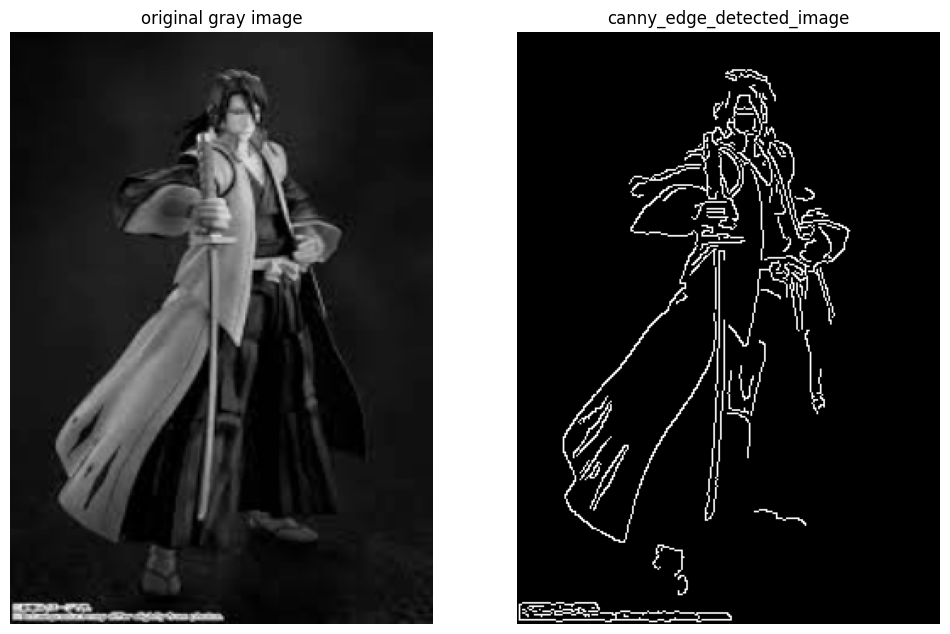

In [107]:
#3)Canny algorithm being the optimum algorithm for edge detection
# Detect edges using Canny algorithm
canny_edges = cv2.Canny(byakuya_img_gray, 100, 200)  # Adjust thresholds for optimal edge detection

# Display the images
plt.figure(figsize=(12,10))

plt.subplot(1, 2, 1)
plt.imshow(byakuya_img_gray, cmap='gray')
plt.axis('off')
plt.title('original gray image'),

plt.subplot(1, 2, 2),
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.title('canny_edge_detected_image')


In This lab program we are detecting images using different edge detection techniques the first technique
1)Sobel operator : it is widely used technique in implementing edge detection technique ,it is a discrete differentiation operator or first order derivative where it computes gradient magnitude of an image where the gradient approximation of image intensity function for image edge detection by finding X and y gradient to detect the image
2)Lapalcian edge detection is another technique to detect edges of an images using CV2.laplacian or kernel . It is a gaussian-based operator which uses the Laplacian to take the second derivative of an image. This really works well when the transition of the grey level seems to be abrupt.
3)canny edge detection:Canny edge detection is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed.